In [ ]:
# Data Wrangling II
# Create an “Academic performance” dataset of students and perform the following operations using
# Python.
# 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
# inconsistencies, use any of the suitable techniques to deal with them.
# 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
# techniques to deal with them.
# 3. Apply data transformations on at least one of the variables. The purpose of this
# transformation should be one of the following reasons: to change the scale for better
# understanding of the variable, to convert a non-linear relation into a linear one, or to
# decrease the skewness and convert the distribution into a normal distribution.
# Reason and document your approach properly.


In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("C:/Users/sai/Desktop/DSBDA/Assi2/StudentsPerformance.csv")

In [4]:
df

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date
0,62.0,77.0,79.0,97.0,2019
1,78.0,90.0,68.0,89.0,2020
2,76.0,NaN,69.0,77.0,2018
3,65.0,NaN,73.0,84.0,2021
4,NaN,78.0,65.0,85.0,2020
5,72.0,88.0,NaN,96.0,2019
6,64.0,86.0,74.0,93.0,2019
7,68.0,78.0,63.0,81.0,2019
8,75.0,91.0,66.0,NaN,2020
9,73.0,90.0,78.0,78.0,2020


In [5]:
df.describe

<bound method NDFrame.describe of     Math_Score  Reading_Score  Writing_Score  Placement_Score  Club_Join_Date
0         62.0           77.0           79.0             97.0            2019
1         78.0           90.0           68.0             89.0            2020
2         76.0            NaN           69.0             77.0            2018
3         65.0            NaN           73.0             84.0            2021
4          NaN           78.0           65.0             85.0            2020
5         72.0           88.0            NaN             96.0            2019
6         64.0           86.0           74.0             93.0            2019
7         68.0           78.0           63.0             81.0            2019
8         75.0           91.0           66.0              NaN            2020
9         73.0           90.0           78.0             78.0            2020
10        71.0           93.0           71.0             92.0            2018
11        70.0           86.0 

In [6]:
df.shape

(30, 5)

In [7]:
df.isnull().sum()

Math_Score         4
Reading_Score      6
Writing_Score      4
Placement_Score    2
Club_Join_Date     0
dtype: int64

In [8]:
df.fillna(df.mean(), inplace=True)

In [9]:
df.head(5)

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date
0,62.000000,77.000000,79.0,97.0,2019
1,78.000000,90.000000,68.0,89.0,2020
2,76.000000,85.791667,69.0,77.0,2018
3,65.000000,85.791667,73.0,84.0,2021
4,70.923077,78.000000,65.0,85.0,2020


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

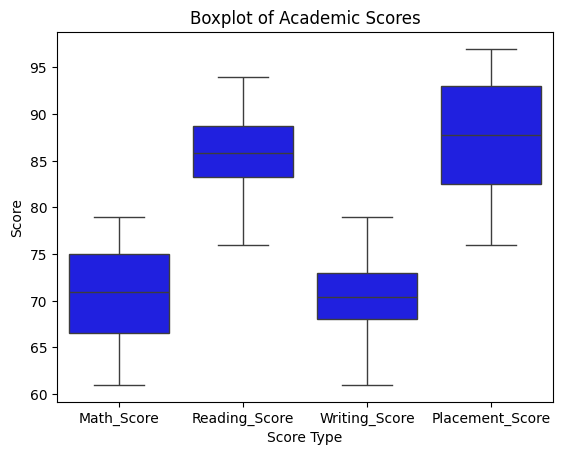

In [33]:
cols = ['Math_Score', 'Reading_Score', 'Writing_Score', 'Placement_Score']
sns.boxplot(data=df[cols], color='blue')
plt.title("Boxplot of Academic Scores")
plt.xlabel("Score Type")
plt.ylabel("Score")
plt.show()

In [40]:
lower_bound = 60
upper_bound = 90
clipped_data = df.clip(lower=lower_bound, upper=upper_bound)


In [ ]:
import pandas as pd
import seaborn as sns

# Load your dataset
data = pd.read_csv("your_dataset.csv")

# Identify numeric variables
numeric_vars = data.select_dtypes(include=['float64', 'int64'])

# Visualize outliers using box plots
sns.boxplot(data=numeric_vars)
# Add more visualization methods as needed

# Define a function to detect outliers using IQR
def remove_outliers_iqr(df, threshold=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[((df >= lower_bound) & (df <= upper_bound)).all(axis=1)]

# Remove outliers using IQR
data_no_outliers = remove_outliers_iqr(numeric_vars)

# Alternatively, you can use Z-score method for outlier detection
from scipy import stats
z_scores = stats.zscore(numeric_vars)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_no_outliers = numeric_vars[filtered_entries]

# Apply other outlier handling techniques as needed

# After handling outliers, you can proceed with further analysis


In [41]:
print(clipped_data)

    Math_Score  Reading_Score  Writing_Score  Placement_Score  Club_Join_Date
0    62.000000      77.000000      79.000000        90.000000              90
1    78.000000      90.000000      68.000000        89.000000              90
2    76.000000      85.791667      69.000000        77.000000              90
3    65.000000      85.791667      73.000000        84.000000              90
4    70.923077      78.000000      65.000000        85.000000              90
5    72.000000      88.000000      70.384615        90.000000              90
6    64.000000      86.000000      74.000000        90.000000              90
7    68.000000      78.000000      63.000000        81.000000              90
8    75.000000      90.000000      66.000000        87.607143              90
9    73.000000      90.000000      78.000000        78.000000              90
10   71.000000      90.000000      71.000000        90.000000              90
11   70.000000      86.000000      61.000000        90.000000   

In [43]:
original_skewness = df['Writing_Score'].skew()
df['Writing_Score_sqrt'] = np.sqrt(df['Writing_Score'])
transformed_skewness = df['Writing_Score_sqrt'].skew()
print("Skewness of Writing_Score before transformation:", original_skewness)
print("Skewness of Writing_Score after square root transformation:", transformed_skewness)

Skewness of Writing_Score before transformation: -0.17950743916072073
Skewness of Writing_Score after square root transformation: -0.21470725043951108


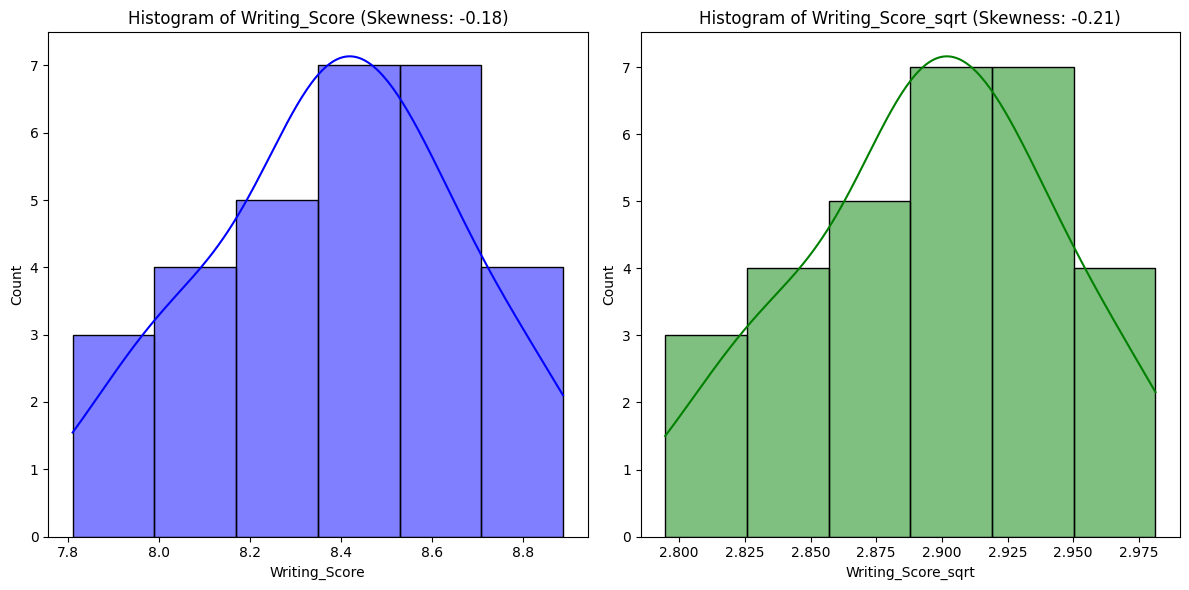

In [50]:

plt.figure(figsize=(12, 6))

# Histogram before transformation
plt.subplot(1, 2, 1)
sns.histplot(df['Writing_Score'], kde=True, color='blue')
plt.title(f'Histogram of Writing_Score (Skewness: {original_skewness:.2f})')

# Histogram after transformation
plt.subplot(1, 2, 2)
sns.histplot(df['Writing_Score_sqrt'], kde=True, color='green')
plt.title(f'Histogram of Writing_Score_sqrt (Skewness: {transformed_skewness:.2f})')

plt.tight_layout()
plt.show()
